# Задание 1

<div style="text-align: right"> 
    
    Домашнее задание I до 18/02/21 
    
    Широков Александр, ПМ-1701
    
    improfeo@yandex.ru
</div> 

1.	Написать функцию `bitOnes :: Integer -> Int`, которая выдает количество единиц в битовом представлении заданного натурального числа. Например, число `36` имеет битовое представление `100100`, поэтому `bitOnes 36 => 2`. Для решения пользуйтесь арифметическими операциями с целыми числами.

In [1]:
bitOnes :: Integer -> Int
bitOnes 0 = 0
bitOnes x = fromIntegral x `mod` 2 + bitOnes (x `div` 2)

Тестирование

In [2]:
map bitOnes [0..10]

[0,1,1,2,1,2,2,3,1,2,2]

In [3]:
bitOnes 127

7

In [4]:
bitOnes 128

1

In [5]:
bitOnes 36

2

2.	Написать функцию `ch :: Double -> Int -> Double`, которая должна вычислять значение *гиперболического косинуса* в заданной точке путем суммирования некоторого числа первых членов ряда в разложении этой функции в ряд Тейлора. Количество суммируемых членов задается вторым аргументом функции.

*Указание*: для проверки правильности результатов можно воспользоваться стандартной функцией `cosh`.

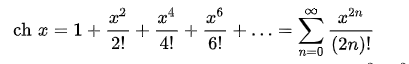

In [6]:
factorial :: Integer -> Integer
factorial n | n == 0 = 1 -- если равно нулю, то единица
            | n > 0  = n * factorial(n-1)

In [7]:
-- Аргументы
    --- x - Double
    --- n - количество суммируемых членов, Int
ch :: Double -> Int -> Double
ch x 0 = 1
ch x n = x ** fromIntegral(2*n) / fromIntegral(factorial (2 * toInteger n)) + ch x (fromIntegral n-1) 

Тестирование

In [8]:
ch 2 20

3.762195691083632

In [9]:
cosh 2

3.7621956910836314

In [10]:
ch 1 3

1.5430555555555556

In [11]:
ch 1 10

1.543080634815244

In [12]:
cosh 1

1.5430806348152437

3. Написать функцию `segmEquals :: Eq a => [a] -> [a]`, которая в списке значений находит отрезок максимальной длины подряд стоящих равных значений. Например, в списке `[1,3,3,6,7,3]` таким отрезком будет `[3,3]`, а в списке `[5,5,5,1,1,1]` результатом может быть любой из двух списков `[5,5,5]` или `[1,1,1]`. Для пустого списка результатом будет также пустой список..

*Замечание*. `Eq a` – ограничение на тип, которое позволяет для сравнения значений использовать операции `(==)` и `(/=)`

Будем хранить список текущих повторяющихся элементов, список оставшихся чисел и лучший список повторяющихся чисел. Если текущий элемент равен следующему элементу (`x == head t`), то добавим в список текущих элементов и продолжим рекурсию. Если же мы дойдем до момента, когда элементы перестанут повторяться, то если этот результат лучше предыдущего наилучшего, то запишем это решение в лучшее (`current_num`).

In [13]:
-- s2
-- Arguments
    -- x - текущий список оставшихся чисел
    -- current_num - текущий список повторяющихся чисел
    -- best_num - текущий лучший список повторяющихся чисел
    
-- sumEquals
-- Argument
    -- x - входной список

s2 :: Eq a => [a] -> [a] -> [a] -> [a]
s2 [] _ best_num  = best_num
s2 [x] current_num best_num = if length current_num > length best_num then current_num else best_num
s2 (x:t) current_num best_num | x == head t = s2 t (x:current_num) best_num
                              | length current_num > length best_num = s2 t [head t] current_num 
                              | otherwise = s2 t [head t] best_num
                                     
sumEquals :: Eq a => [a] -> [a]
sumEquals [] = []
sumEquals x = s2 x [] []

In [14]:
sumEquals [1, 3, 3, 6, 7, 3]

[3,3]

In [15]:
sumEquals [1, 3, 3, 6, 7, 7, 7, 7, 3]

[7,7,7,7]

In [16]:
sumEquals [1, 3, 3, 3, 6, 7, 7, 7, 7, 7, 3, 8, 8, 8, 8]

[7,7,7,7,7]

In [17]:
sumEquals [1,3,3,6,7,7,7,3]

[7,7,7]

In [18]:
sumEquals [5,5,5,1,1,1]

[1,1,1]

In [19]:
sumEquals []

[]

In [20]:
sumEquals [5,5,5,1,1,1,2,2]

[1,1,1]